<a href="https://colab.research.google.com/github/pritisurya/Brand-Name-generator/blob/main/Copy_of_IP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving img1.jpg to img1.jpg
Original Image:


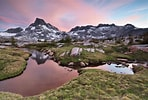


Enhanced Image:


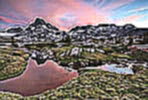

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import os

def enhance_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to float32 for arithmetic operations
    img_float = img.astype(np.float32) / 255.0

    # Increase contrast
    contrast = 1.5
    img_contrasted = cv2.pow(img_float, contrast)

    # Increase brightness
    brightness = 30
    img_bright = cv2.add(img_contrasted, brightness/255.0)

    # Clip values to ensure they are in the [0, 1] range
    img_clipped = np.clip(img_bright, 0, 1)

    # Convert back to uint8
    img_enhanced = (img_clipped * 255).astype(np.uint8)

    # Sharpen the image
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img_sharpened = cv2.filter2D(img_enhanced, -1, kernel)

    # Apply a slight Gaussian blur to reduce noise
    img_final = cv2.GaussianBlur(img_sharpened, (3,3), 0)

    return img_final

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the uploaded image
original = cv2.imread(filename)

# Enhance the image
enhanced_image = enhance_image(filename)

# Display the original and enhanced images
print("Original Image:")
cv2_imshow(original)
print("\nEnhanced Image:")
cv2_imshow(enhanced_image)

# Save the enhanced image
output_filename = 'enhanced_' + filename
cv2.imwrite(output_filename, enhanced_image)

# Download the enhanced image
files.download(output_filename)



Saving img2.jpg to img2.jpg
Saving img1.jpg to img1 (2).jpg
Original Image 1:


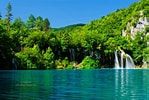


Original Image 2:


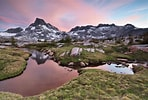


Added Image:


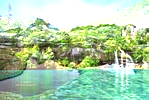

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def add_images(img1, img2):
    # Ensure both images are the same size
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Add images
    img_added = cv2.add(img1, img2)

    return img_added

# Upload the images
uploaded = files.upload()

# Get the filenames of the uploaded images
filenames = list(uploaded.keys())

if len(filenames) != 2:
    raise ValueError("Please upload exactly two images.")

# Read the uploaded images
image1 = cv2.imread(filenames[0])
image2 = cv2.imread(filenames[1])

# Add the images
added_image = add_images(image1, image2)

# Display the original images and the added image
print("Original Image 1:")
cv2_imshow(image1)
print("\nOriginal Image 2:")
cv2_imshow(image2)
print("\nAdded Image:")
cv2_imshow(added_image)

# Save the added image
output_filename = 'added_image.png'
cv2.imwrite(output_filename, added_image)

# Download the added image
files.download(output_filename)

